<center><img src="https://is1-ssl.mzstatic.com/image/thumb/Purple122/v4/05/e7/67/05e76784-3364-b535-7e20-b3f4946a56b6/AppIcon-0-0-1x_U007emarketing-0-0-0-7-0-0-sRGB-0-0-0-GLES2_U002c0-512MB-85-220-0-0.png/434x0w.webp" style="height:150px"></center>

<hr style="border-width:2px;border-color:red">
<center><h1>Test Technique Data Scientist</h1></center>
<center><h2> Mesure de la dérive </h2></center>
<hr style="border-width:2px;border-color:red">

# Contexte

La **dérive** en apprentissage automatique (ou **"drift"** en anglais) fait référence à un **changement dans les données d'entrée ou de sortie d'un modèle** de machine learning **après son entraînement initial**. Cela peut se produire lorsque les données utilisées pour entraîner le modèle ne **reflètent plus la réalité**, ou lorsque **les conditions du problème changent de manière significative**.

La dérive des données peut affecter la précision du modèle de manière significative et peut entraîner des erreurs coûteuses dans les prévisions ou les décisions basées sur le modèle. Par conséquent, **il est important de surveiller régulièrement les performances du modèle** et de le mettre à jour en fonction des nouveaux jeux de données ou des nouvelles conditions du problème.

# Objectif

Dans ce test, vous allez implémenter des métriques permettant de mesurer la dérive d'un modèle dans un usecase de **e-commerce** où nous essayons de prédire le **panier total** (variable **`TotalCart`** : chiffre d'affaire total d'un client sur la période donnée) des clients en fonction des variables suivantes:
* **`Age`** : âge du client en années.
* **`Seniority`** : ancienneté du client en années.
* **`Orders`** : Nombre de commandes effectuées sur la période précédente.
* **`Items`** : Nombre d'items commandés sur la période précédente.
* **`AverageDiscount`** : Réduction moyenne accordée au client sur la période précédente en pourcentage.
* **`TopCategory`** : Catégorie de produits favorite du client.
* **`BrowsingTime`** : Temps total passé sur le site web sur la période précédente en secondes.
* **`EmailsOpened`** : Nombre de mails marketing ouverts par le client sur la période précédente.
* **`SupportInteractions`** : Nombre d'interactions que le client a eu avec le service client sur la période précédente.

Le jeu de données est décomposé en 4 périodes correspondant aux 4 trimestres de l'année 2022. Vous trouverez les données correspondant à chaque période dans les fichiers **`period_0.csv`**, **`period_1.csv`**, ..., **`period_3.csv`**.

Vous allez d'abord **entraîner et évaluer un modèle de machine learning** sur les données de la **période 0**. On supposera que ce modèle sera utilisé pour effectuer les prédictions de panier total sur toute l'année 2022.

Ensuite, vous devrez **implémenter des métriques de dérive** qui vous seront données et **effectuer une analyse** de celle-ci.

# I - Mesure de la dérive de variables catégorielles.

Pour deux distributions de probabilités discrètes $P$ et $Q$, la **divergence de Kullback–Leibler** de $P$ par rapport à $Q$ est définie par:

$$D_\text{KL}(P \parallel Q) = \sum_{x\in\mathcal{X}} P(x) \log\left(\frac{P(x)}{Q(x)}\right)$$


On définit la **divergence de Jensen-Shannon** comme une version lisse et symétrique de la divergence de Kullback-Leiber donnée par la formule suivante:

$${\rm JSD}(P \parallel Q)= \frac{1}{2}D(P \parallel M)+\frac{1}{2}D(Q \parallel M)$$

où $M=\frac{1}{2}(P+Q)$

### Exemple de calcul de $D_\text{KL}(P \parallel Q)$ : 

Soient $P$ =`[0.2, 0.3, 0.5]` et $Q$ =`[0.2, 0.4, 0.4]` deux vecteurs définissant une loi de probabilité discrete. Alors : 

$$
\begin{equation}
\begin{split}
D_\text{KL}(P \parallel Q) & = P(0) \log\left(\frac{P(0)}{Q(0)}\right)
                             + P(1) \log\left(\frac{P(1)}{Q(1)}\right)
                             + P(2) \log\left(\frac{P(2)}{Q(2)}\right)\\ \\
                           & = 0.2 \log\left(\frac{0.2}{0.2}\right)
                             + 0.3 \log\left(\frac{0.3}{0.4}\right)
                             + 0.5 \log\left(\frac{0.5}{0.4}\right) \\ \\
                           & = 0.02526...
\end{split}
\end{equation}
$$

### Exercice

* Implémenter des fonctions nommées **`KLDivergence(P, Q)`** et **`JSDivergence(P, Q)`** permettant de calculer les métriques définies ci-dessus.

**Conseils**:
* Utiliser la librairie Numpy permettant de facilement effectuer des calculs d'algèbre linéaire.

In [1]:
import io
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

line = "="*50

import warnings 
warnings.filterwarnings('ignore')
# warnings.resetcarnings()

In [2]:
import numpy as np 

P = np.array([0.2, 0.3, 0.5])
Q = np.array([0.2, 0.4, 0.4])
# Q = np.array([0, 0.4, 0.4])

def KLDivergence(P, Q):
    # o = 1e-10
    # il faut que les distributions de probabilités ne comportent pas de 0 c'est à dire que les données soient bien spécifiées
    # ajouter une constante epsilon pour le problème de la division par 0
    # return np.sum(P * np.log((P+o)/(Q+o)))
    return np.sum(P * np.log(P/Q))
    
def JSDivergence(P, Q):
    M = (P + Q)/2
    a = KLDivergence(P, M)/2
    b = KLDivergence(P, M)/2
    return (a+b)/2

* Lancer la cellule suivante pour tester votre fonction.

In [3]:
print("K-L Divergence:", KLDivergence(P, Q)) # compris entre 0 et 1
print("J-S Divergence:", JSDivergence(P, Q))

K-L Divergence: 0.02526715392157057
J-S Divergence: 0.003217526940367855


# Mesure de la dérive de variables quantitatives.

Soit $P$ une mesure empirique d'échantillons $X_1, \ldots, X_n
$ et $Q$ une mesure empirique d'échantillons $Y_1, \ldots, Y_n$, on définit la **Distance de Wasserstein** d'ordre $p$ par la fonction suivante :

$$W_p(P, Q) = \left( \frac{1}{n}\sum_{i=1}^n \|X_{(i)} - Y_{(i)}\|^p \right)^{1/p}$$

où $X_{(1)}, \ldots, X_{(n)}$ et $Y_{(1)}, \ldots, Y_{(n)}$ sont les [**statistiques d'ordre**](https://en.wikipedia.org/wiki/Order_statistic#Notation_and_examples) des échantillons $X$ et $Y$ et $p$ un nombre entier positif.

### Exercice

* Implémenter une fonction nommée **`WassersteinDistance(X, Y, p)`** permettant de calculer cette métrique à l'ordre **`p`** à partir de **deux échantillons** **`X`** et **`Y`** que l'on supposera de même longueur.

**Conseils**:
* Vous pouvez trier les échantillons pour obtenir les statistiques d'ordre.

In [4]:
def WassersteinDistance(X, Y, p):
    
    n = len(X)
    # ordonner les distributions
    X_o, Y_o = np.sort(X), np.sort(Y) 
    
    # étapes
    D = X_o - Y_o 
    res = np.sum(np.abs(D)**p)
    res /= n
    res = res**(1/p)
    return res

In [62]:
np.random.seed(2309)
X = np.random.beta(2, 6, 100)
Z = np.random.beta(2, 6, 100)

Y = np.random.beta(3, 6, 100)

WassersteinDistance(X, Y, 2)

0.0751248557060624

La distance de Wassertein est une statistique calculée sur deux distributions. On peut donc calculer son espérance et sa variance. 

In [61]:
def var_WassersteinDistance(X, Y, p):
    # sa variance peut se déduire de la variance de la distribution X_ordered - Y_ordred
    n = len(X)
    # ordonner les distributions
    X_o, Y_o = np.sort(X), np.sort(Y) 
    D = X_o - Y_o
    res_p = (np.abs(D))**(p)
    res_p /= n
    variance_WD_puissance_p = np.var(res_p)
    return variance_WD_puissance_p**(1/p)

def esp_WassersteinDistance(X, Y, p):
    # de même son espérance peut se déduire de l'espérance de la distribution X_ordered - Y_ordred
    n = len(X)
    # ordonner les distributions
    X_o, Y_o = np.sort(X), np.sort(Y) 
    D = X_o - Y_o
    res_p = (np.abs(D))**(p)
    res_p /= n
    esperance_WD_puissance_p = np.mean(res_p)
    return esperance_WD_puissance_p**(1/p)

print("variance WD :", var_WassersteinDistance(X, Y, 2))
print("espérance WD :", esp_WassersteinDistance(X, Y, 2))

variance WD : 8.277079022583028e-06
espérance WD : 0.0016831246474491547


In [43]:
esp_WassersteinDistance(X, Y, 2) + 2*var_WassersteinDistance(X, Y, 2)

0.009511439958870837

# II - Entraînement du modèle

* **Entraînez et validez** deux ou trois modèles de votre choix sur les données de la période 0. 

**Conseils**

* Vous serez évalué sur votre **rigueur** et non sur les performances du modèle.


* Il n'est pas nécessaire de faire une analyse exploratoire des données.


* Il n'est pas nécessaire de faire de recherche d'hyperparamètres optimaux non plus mais vous pouvez le faire si vous le souhaitez.

#### 1 - Chargement des données

Chargement des données depuis le dépôt github..

In [89]:
url = "https://raw.githubusercontent.com/fereol023/test_drift/main/datasets/period_"
data = dict()

# enregistrer toutes les données de bases dans un seul endroit indexé par le temps
for t in range(4):
    url2 = url + str(t) + ".csv"
    # print(url2)
    download = requests.get(url2).content
    data[t] = pd.read_csv(io.StringIO(download.decode()))

# aperçu
data[0].head()

,Age,Seniority,Orders,Items,AverageDiscount,TopCategory,BrowsingTime,EmailsOpened,SupportInteractions,TotalCart
0,21,2,4,7,0.14,"Clothing,Shoes & Jewelry",68.473629,3,2,34.00
1,22,0,4,5,0.50,Toys & Games,29.258063,1,0,28.28
2,22,1,2,6,0.37,"Health, Household & Baby Care",11.515517,0,0,19.33
3,19,0,2,8,0.60,Toys & Games,74.495861,1,0,26.83
4,25,1,1,5,0.58,Toys & Games,1.682705,2,1,17.67


Aperçu des types de variables et de leur description globale, la taille de données etc. utile pour savoir quelle approche adopter

In [90]:
df0 = data[0]
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1000 non-null   int64  
 1   Seniority            1000 non-null   int64  
 2   Orders               1000 non-null   int64  
 3   Items                1000 non-null   int64  
 4   AverageDiscount      1000 non-null   float64
 5   TopCategory          1000 non-null   object 
 6   BrowsingTime         1000 non-null   float64
 7   EmailsOpened         1000 non-null   int64  
 8   SupportInteractions  1000 non-null   int64  
 9   TotalCart            1000 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 78.2+ KB


Nous pouvons voir que la variable *TopCategory* des variables est de type 'object'. Il faudra l'encoder par la suite.<br><br>A part ça, toutes les variables semblent être prêtes : <br><br>*TotalCart* est de type 'float' continue de même que *AverageDiscount* et *BrowsingTime*.<br> Les autres sont des variables catégorielles ou de comptage. <br>Il n'y a pas de valeur manquante.<br><br>Observons ensuite quelques statistiques calculées sur ces variables pour avoir un aperçu des distributions.

In [91]:
df0.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,24.069000,5.059430,7.000000,21.000000,24.000000,27.000000,41.000000
Seniority,1000.0,0.508000,0.720038,0.000000,0.000000,0.000000,1.000000,4.000000
Orders,1000.0,3.011000,1.731438,0.000000,2.000000,3.000000,4.000000,9.000000
Items,1000.0,5.975000,2.399194,1.000000,4.000000,6.000000,7.000000,15.000000
AverageDiscount,1000.0,0.371700,0.219133,0.000000,0.180000,0.380000,0.560000,0.750000
BrowsingTime,1000.0,97.949068,100.222845,0.012724,29.333357,68.037177,127.063901,831.026761
EmailsOpened,1000.0,0.989000,1.002938,0.000000,0.000000,1.000000,2.000000,5.000000
SupportInteractions,1000.0,1.012000,1.022204,0.000000,0.000000,1.000000,2.000000,7.000000
TotalCart,1000.0,35.884260,17.619171,0.000000,25.575000,33.655000,43.772500,138.880000


On cherche aussi à visualiser les liens entre les variables : linéaires ou quadradatique pour avoir des pistes sur le type de modélisation.

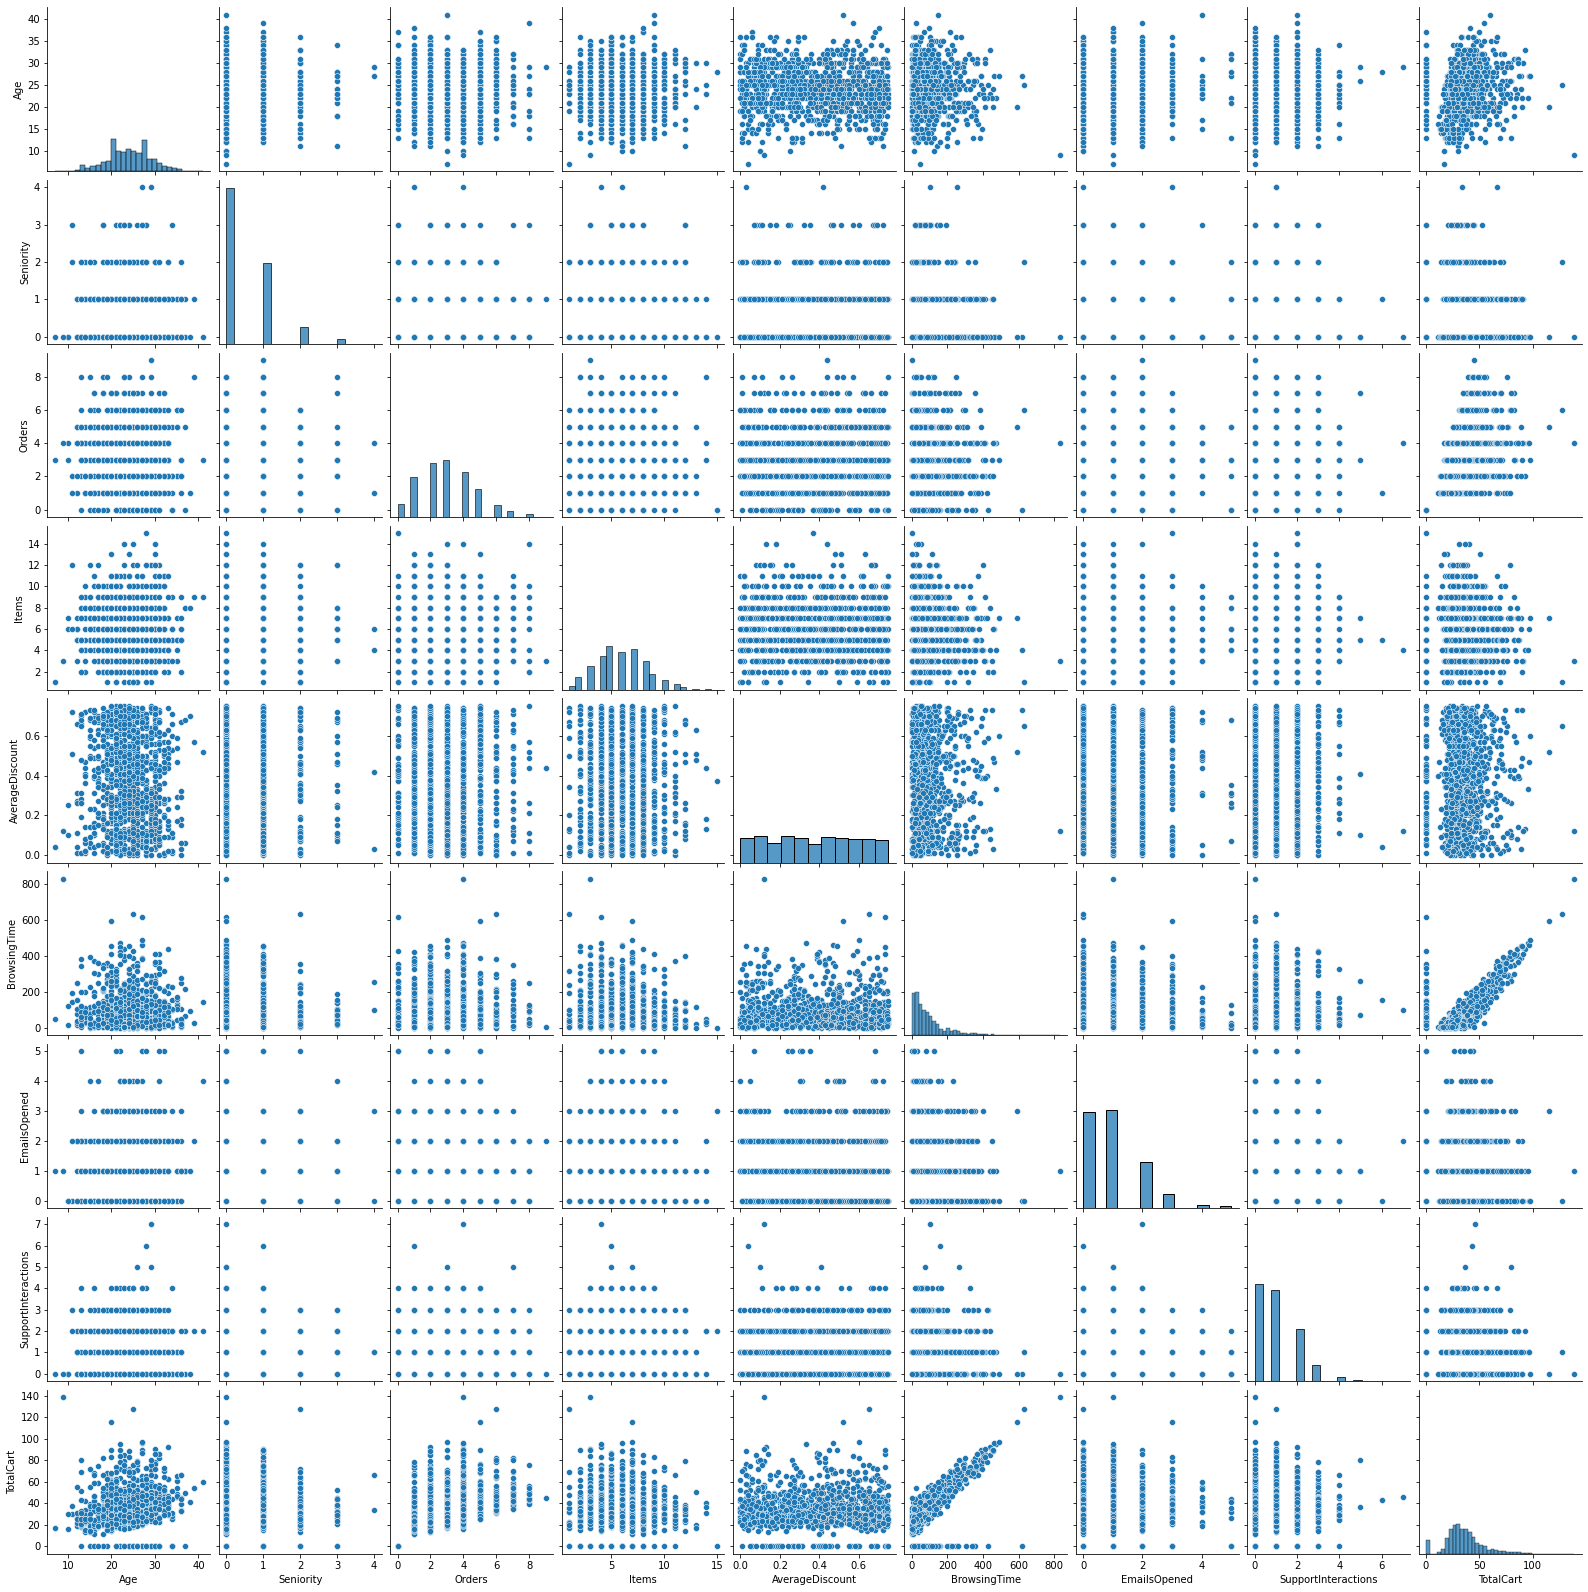

In [92]:
sns.pairplot(df0)

#### 2 - Preprocessing

In [93]:
df0.dtypes

Age                      int64
Seniority                int64
Orders                   int64
Items                    int64
AverageDiscount        float64
TopCategory             object
BrowsingTime           float64
EmailsOpened             int64
SupportInteractions      int64
TotalCart              float64
dtype: object

Nous encodons donc la variable *TopCategory* avec une fonction (pour la réplicabilité sur les autres datasets)

In [94]:
def clean_df(df, col="TopCategory"):
    
    encoded_top_cat = LabelEncoder().fit_transform(df[col])
    df[col] = encoded_top_cat
    return df

clean_df(df0).dtypes

Age                      int64
Seniority                int64
Orders                   int64
Items                    int64
AverageDiscount        float64
TopCategory              int32
BrowsingTime           float64
EmailsOpened             int64
SupportInteractions      int64
TotalCart              float64
dtype: object

#### 3 - Training

**Sélection de modèles**<br><br>
La variable a prédire est le CA total d'un client sur une période donnée. Il s'agit d'un **problème de régression** en raison de la nature quantitative et continue de cette variable et de ses prédicteurs. Les modèles suivants sont les plus aptes à traduire le lien existant entre le CA et les autres variables observées : <br><br>

a - **Régression Linaire multiple** : <br>Car nous disposons de plusieurs prédicteurs et il ne semble pas y avoir de relation autre que linéaire entre les variables quantitatives du dataset (cf. matrice). <br><br>
b - **RandomForest** <br><br>
c - **SVR**<br><br>

Nous n'exploiterons pas la piste du **SGD (descente de gradient)** car à priori on peut dire qu'il y  trop peu  de données (1000 observations) pour que ce type de modèle converge bien.

In [95]:
seed = 2309

# pour éviter de répeter partout au cas où le nom change
target = "TotalCart"

X = df0.drop(target, axis=1)
y = df0[target]

# Train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = seed) 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(700, 9) (300, 9) (700,) (300,)


In [96]:
# -- copies pour ne pas abîmer les jeux de données originels
df1 = clean_df(data[1].copy())
df2 = clean_df(data[2].copy())
df3 = clean_df(data[3].copy())

# features
X_test1 = df1.drop(target, axis=1)
X_test2 = df2.drop(target, axis=1)
X_test3 = df3.drop(target, axis=1)
# targets
y_test1 = df1[target]
y_test2 = df2[target]
y_test3 = df3[target]

In [97]:
# Modèle de reg lineaire multiple
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [98]:
# Modèle random forest 
rf = RandomForestRegressor(random_state=seed)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=2309)

In [99]:
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

SVR()

In [100]:
def evaluate_model(model, rep = False):
    # fonction d'évaluation des modèles 
    
    train_preds = model.predict(X_train)
    rmse_train = round(mean_squared_error(y_train, train_preds, squared=False), 3)
    
    test_preds = model.predict(X_test)
    rmse_test = round(mean_squared_error(y_test, test_preds, squared=False), 3)
    
    print(line)
    print("Train set error :",rmse_train) 
    print("Test set error :", rmse_test)

In [101]:
print("Regression lineaire")
evaluate_model(lr)
print("\nRandom forest")
evaluate_model(rf)
print("\nSupport Vector Reg")
evaluate_model(svr)

Regression lineaire
Train set error : 8.325
Test set error : 7.29

Random forest
Train set error : 1.109
Test set error : 3.017

Support Vector Reg
Train set error : 12.129
Test set error : 12.387


Le modèle **Random Forest** apprend mieux sur les données, il fait en moyenne moins d'erreurs que les deux autres modèles lors de  la phase d'apprentissage. De même lors de la phase de test, le modèle Random Forests surperforme le modèle de Régression Linéaire et le Support Vector Regressor. On gardera donc le Random Forest pour la suite.   

# III - Étude de la dérive du modèle.

### Consignes

* En vous appuyant sur les métriques définies précédemment, illustrez et analysez visuellement la **dérive des données** ainsi que **la dérive du modèle** sur les périodes **1 à 3**. 


* Commenter les visualisations et déterminer si le modèle doit être mis à jour ou si sa performance est toujours acceptable. 

**Conseils**:
* Vous serez évalué sur **la rigueur et le soin** que vous donnerez à votre analyse, et sur **vos capacités à synthéthiser votre étude**. Vous ne serez pas évalué sur vos conclusions.


* Vous pouvez normaliser les données par rapport aux **moyennes et variances que vous calculerez sur la période 0** pour que les distances de Wasserstein pour différentes variables soient facilement comparables.

### Eléments de réponses
Nous programmons une fonction qui teste le modèle en période 0, et sur les périodes suivantes, puis nous représentons la performance du modèle sur les périodes suivantes.

In [102]:
def evaluate_model_toutes_periodes(model, t=3, rep = False):
    
    # on enregistre les performances sur le train et le test set dans une liste
    res = list()
    # print(X_train.shape)
    test_preds = model.predict(X_test)
    rmse_test = round(mean_squared_error(y_test, test_preds, squared=False), 3)
    # le premier résultat est donc celui de la période 0
    res.append(rmse_test)
    
    # ensuite à chaque période 
    for k in range(1, t+1) :
        # on enchaine nettoyage et découpage en train test sets
        X_test_period = clean_df(data[k]).drop(target, axis=1)
        y_test_period = clean_df(data[k])[target]

        test_preds_period = model.predict(X_test_period)
        rmse_test_period = round(mean_squared_error(y_test_period, test_preds_period, squared=False), 3)
        res.append(rmse_test_period)

    if rep :
        # retourne les résultats sous format exploitable (liste)
        return res 
    else : 
        print(line)
        print("Train set error :",rmse_test)
        for k in range(1, t+1) :
            print("Period "+str(k)+" set error :", res[k])

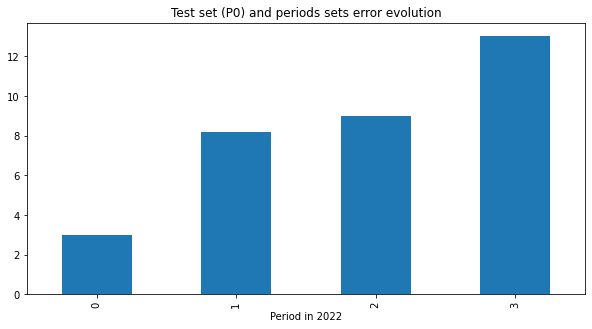

In [103]:
# constat de la derive du modèle
perfs = evaluate_model_toutes_periodes(rf, rep=True)
R = pd.Series(perfs).plot(kind='bar', title='Test set (P0) and periods sets error evolution', xlabel='Period in 2022', figsize=(10,5))

#### Conclusion partielle : 
Nous avons choisi le modèle Random Forest pour la suite. Ce modèle est entrainé sur la période de référence P0 avec un bon score sur les train/test sets. 
Puis en surveillant la métrique de sortie, nous remarquons que à partir de P1 à P3 les performances du modèle se dégradent 
progressivement (cf. graphique ci-dessus). Quelles sont les causes possibles ?<br><br>

**Schéma d'analyse pour la suite** : <br><br>
La suite de l'analyse sera guidée par les réponses aux questions suivantes. <br>
La **distribution des données** à l'entrée a-t-elle changé par rapport au train set (data drift) ?<br>
* Si oui, ré entrainer le modèle..<br>
* Si non, alors la **relation entre les variables** a changé (concept drift) : le modèle est-il toujours d'actualité au regard des nouvelles données.. ? *(à priori, dans le secteur du e-commerce ou des activités avec des rushs saisonniers il arrive d'utiliser des modèles différents pour les périodes particulières par exemple)* 

Pour rappel, le contenu de chaque variable : <br>

* **TotalCart** : chiffre d'affaire total d'un client sur la période donnée) des clients
* **Age** : âge du client en années.
* **Seniority** : ancienneté du client en années.
* **Orders** : Nombre de commandes effectuées sur la période précédente.
* **Items** : Nombre d'items commandés sur la période précédente.
* **AverageDiscount** : Réduction moyenne accordée au client sur la période précédente en pourcentage.
* **TopCategory** : Catégorie de produits favorite du client.
* **BrowsingTime** : Temps total passé sur le site web sur la période précédente en secondes.
* **EmailsOpened** : Nombre de mails marketing ouverts par le client sur la période précédente.
* **SupportInteractions** : Nombre d'interactions que le client a eu avec le service client sur la période précédente.

<br>On va évaluer le data drift par rapport à P0. Donc on réparti les variables en deux sets : catégorielles et quantitatives. Pour chaque groupe, on défini une fonction qui fera le traitement suivant : <br> 
- A chaque période P1 P2 P3, prendre une variable dans le lot et calculer la KL Divergence ou la distance de Wassertein par rapport à la distribution de P0 <br>
- stocker l'historique dans un tableau et le renvoyer (on pourra alors visualiser)

#### a - Variables catégorielles

In [104]:
var_qual = ['TopCategory']

In [105]:
def all_JSD(var_qual, t):
    # on définit un dictionnaire pour enregistrer les divergences de toutes les variables qualitatives du dataset
    JSD = {}
    for var in var_qual :
        # on definit une liste pour récupérer les valeurs des divergences
        res = []
        # on prend la distribution de la période 0 comme référence
        P = clean_df(data[0])[var]
        for k in range (1, t+1) : 
            # à chaque période on récupère la distribution de la variable voulue
            Q = clean_df(data[k])[var]
            res.append(JSDivergence(P, Q))
        # on enregistre les divergences pour la variable
        JSD[var] = res
    return pd.DataFrame(JSD)

<AxesSubplot:title={'center':'Evolution de la divergence des variables qualitatives'}, xlabel='Period'>

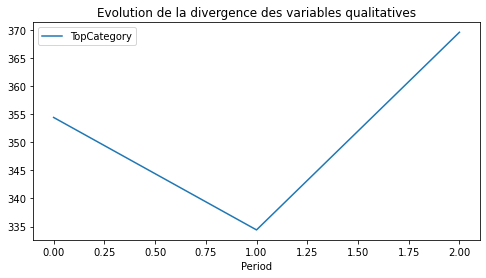

In [106]:
divs_quali = all_JSD(var_qual, t=3)
divs_quali.plot(kind='line', title='Evolution de la divergence des variables qualitatives', xlabel='Period', figsize=(8,4))

On remarque que la valeur de la métrique de dérive est assez élevée. **Si les distributions étaient les mêmes, la valeur attendue est 0** (exception d'une probabilité de classe = 0). Pour mieux comprendre, nous allons analyser le changement de distribution par période pour cette variable. Les distributions de la variable TopCategory pour chacune des 4 périodes en 2022 est la suivante : 

<AxesSubplot:xlabel='TopCategory', ylabel='count'>

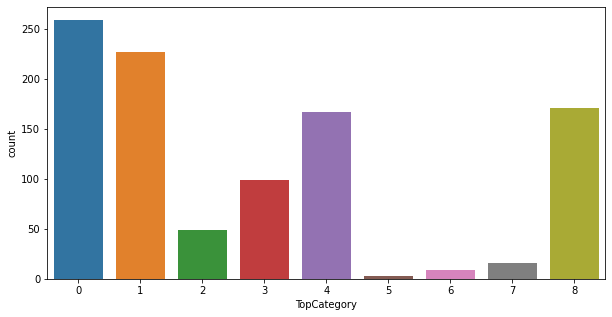

In [107]:
# en periode 0
plt.figure(figsize=(10, 5))
sns.countplot(df0['TopCategory'])

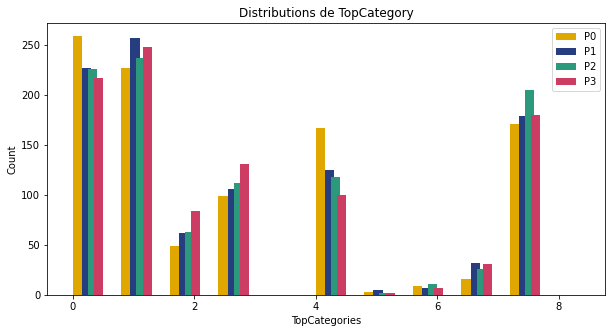

In [108]:
plt.figure(figsize=(10, 5))

plt.hist(df0['TopCategory'], width=0.15, color='#dfa700')
plt.hist(df1['TopCategory']+0.15, width=0.15, color='#263e7f')
plt.hist(df2['TopCategory']+0.25, width=0.15, color='#2d997c')
plt.hist(df3['TopCategory']+0.35, width=0.15, color='#cc3c63')

# labels et title
plt.legend(['P0', 'P1', 'P2', 'P3'])
plt.xlabel('TopCategories')
plt.ylabel('Count')
plt.title('Distributions de TopCategory')

plt.show()

#### Conclusion partielle sur la variable qualitative : 

Le top (le mode) change selon la période :<br> 
- période 0 : catégorie 0  <br>
- période 1 : catégorie 1  <br>
- période 2 : catégorie 1  <br>
- période 3 : catégorie 1  <br><br>
Pour le reste du classement : <br>
- période 0 : [0, 1, 4, 8, 3, 2, 7, 6, 5]  <br>
- période 1 : [1, 2, 8, 4, 3, 2, 7, 6, 5] <br>
- période 2 : [1, 0, 8, 3, 4, 2, 7, 6, 5]  <br>
- période 3 : [1, 0, 8, 3, 4, 2, 7, 6, 5]  <br><br>
On voit que globalement la tendance des catégories de produits favoris des clients se conserve mais le mode et les tops changent entre la période de référence et P1 P2 et P3. **Il faudrait actualiser le modèle du point de vue de cette variable car sa distribution a changé.** 

#### b - Variables quantitatives

Distance de wassertein

- Il n'y a pas de valeurs seuils universelles, le seuil de déviance dépend du contexte de l'étude

In [109]:
var_quant = ['TotalCart', 'Age', 'Seniority', 'Orders', 'Items', 'AverageDiscount', 
         'BrowsingTime', 'EmailsOpened', 'SupportInteractions']

In [110]:
def all_WDD(var_quant, t):
    # on définit un dictionnaire pour enregistrer les divergences de toutes les variables quantitatives du dataset
    WDD = {}
    
    for var in var_quant :
        # on definit une liste pour récupérer les valeurs des divergences
        res = []
        # on prend la distribution de la période 0 comme référence
        P = data[0][var].to_numpy().reshape(-1, 1)
        P = StandardScaler().fit_transform(P)
        for k in range (1, t+1) : 
            # à chaque période on récupère la distribution de la variable voulue
            Q = data[k][var].to_numpy().reshape(-1, 1)
            Q = StandardScaler().fit_transform(Q)
            res.append(WassersteinDistance(P, Q, 2))
        # on enregistre les divergences pour la variable
        WDD[var] = res
    return pd.DataFrame(WDD)

In [111]:
divs_quanti.max()

TotalCart              1.452795
Age                    1.425679
Seniority              1.435146
Orders                 1.445244
Items                  1.439975
AverageDiscount        1.434927
BrowsingTime           1.434522
EmailsOpened           1.413906
SupportInteractions    1.408383
dtype: float64

In [112]:
divs_quanti.min()

TotalCart              1.395757
Age                    1.386105
Seniority              1.407710
Orders                 1.432729
Items                  1.374857
AverageDiscount        1.392752
BrowsingTime           1.350445
EmailsOpened           1.389347
SupportInteractions    1.372020
dtype: float64

<AxesSubplot:title={'center':'Evolution de la divergence des variables quantitatives'}, xlabel='Period'>

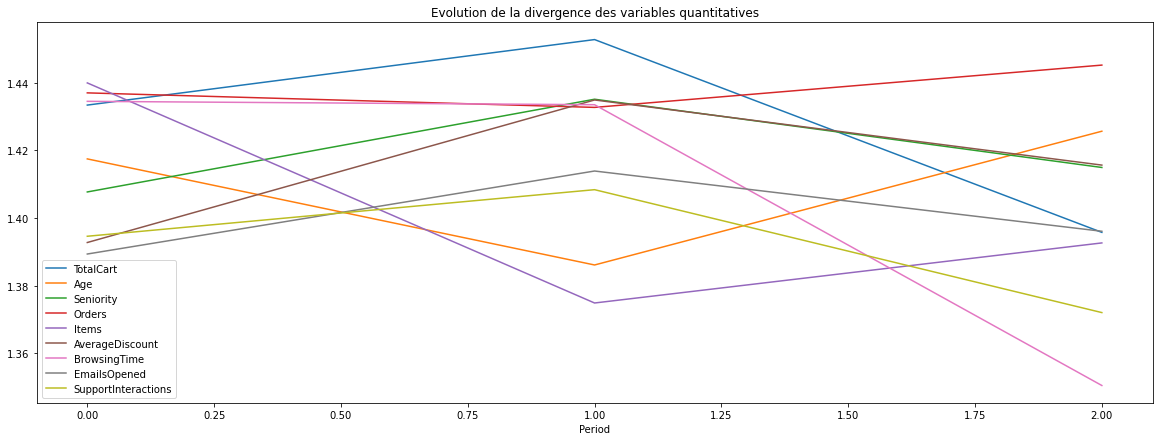

In [113]:
divs_quanti = all_WDD(var_quant, t=3)
divs_quanti.plot(kind='line', title='Evolution de la divergence des variables quantitatives', 
                 xlabel='Period', figsize=(20,7))

Si les distributions étaient restées inchangées, la WD serait proche de 0. Or on remarque ici que les WD (toutes variables confondues) **sont plus grandes que 1.35**. Puisqu'on n'a pas encore de valeur référence pour décider, on va observer les distributions regarder chaque variable au détail. 

#### Comparaison des distributions de chacune de variables entre P0 et P3

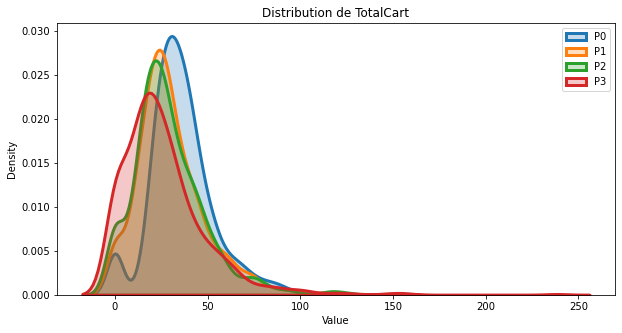

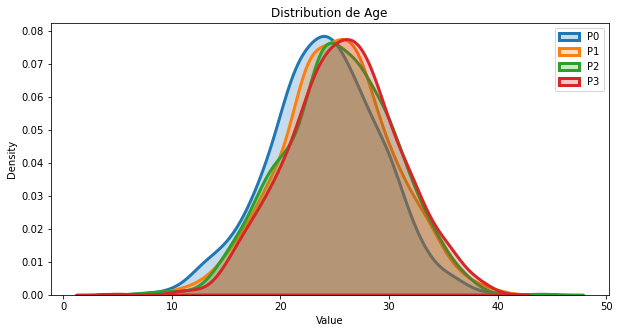

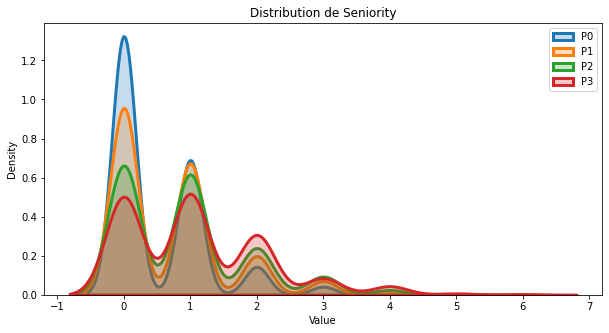

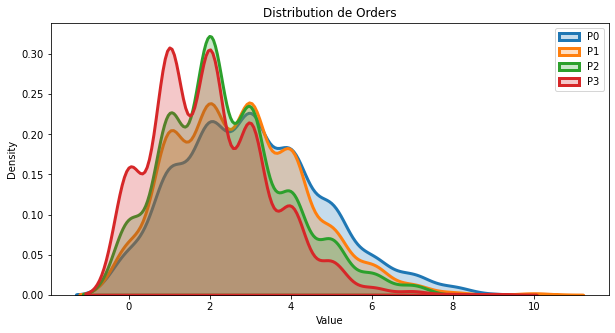

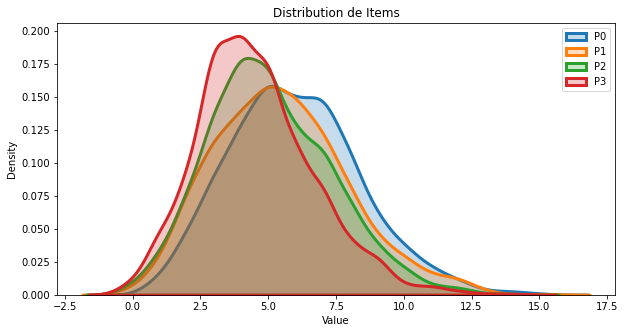

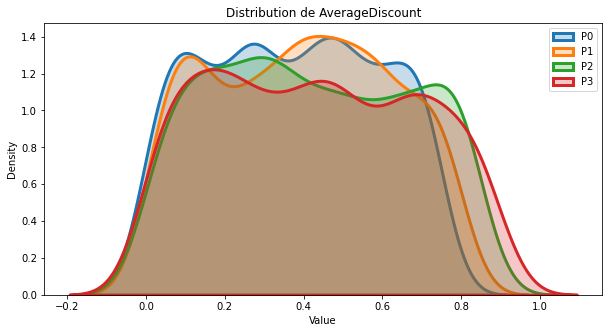

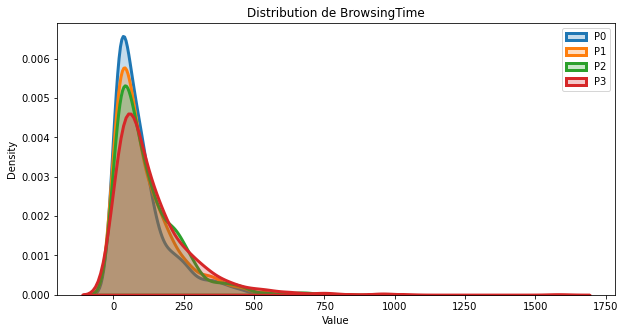

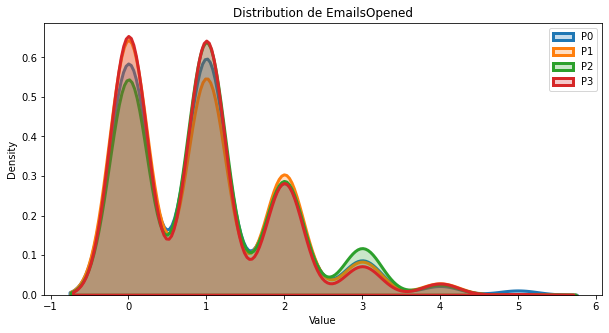

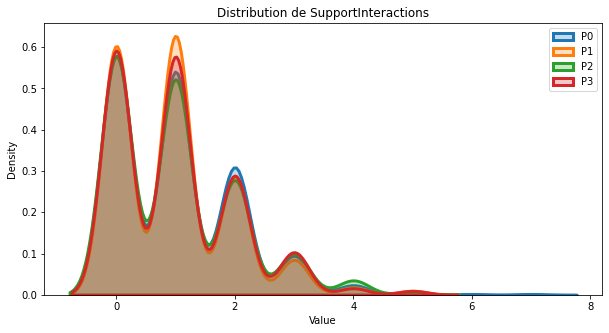

In [114]:
for var in var_quant : 
    plt.figure(figsize=(10, 5))

    sns.distplot(df0[var], hist=False, kde_kws={'linewidth': 3, 'shade': True}, label='P0')
    sns.distplot(df1[var], hist=False, kde_kws={'linewidth': 3, 'shade': True}, label='P1')
    sns.distplot(df2[var], hist=False, kde_kws={'linewidth': 3, 'shade': True}, label='P2')
    sns.distplot(df3[var], hist=False, kde_kws={'linewidth': 3, 'shade': True}, label='P3')

    # titre et labels pour les axes
    plt.title('Distribution de ' + str(var))
    plt.xlabel('Value')
    plt.ylabel('Density')

    # legend and plot
    plt.legend()
plt.show()

Avec une première lecture graphique, on peut dire que les distributions restent globalement inchangées car les fonctions de densité ont la même allure. Nous allons par la suite essayer de définir des seuils d'alertes pour la métrique WD en nous basant sur son **espérance** et sa **variance** afin de confirmer ce constat visuel. <br><br>

==========================================================================================================<br>
On peut construire un intervalle de confiance sur une statistique (ici distance de Wassertein) en utilisant le **théorème centrale limite (TCL)**. Cependant bien que nous ayons assez d'observations, il faut faire deux hypothèses sur les distributions des échantillons. Ils doivent êtres **indépendants** et **identiquement distribués** <br>
	
   Application : <br>
   - Hypothèse : <u>Supposons que les observations soient iid à chaque période</u> dans ce cas pour 1000 individus on pourrait faire une approximation par la loi normale (TCL). L'Intervalle de confiance à 95% (par exemple) autour de la distance de Wassertein (seuils d'alerte pour la distance WD)  est alors :  <br><br>
$$E(WD)\pm2*\sigma(WD)$$
   
Nous construirons par la suite un IC autour de la valeur espérée de WD à chaque période P0/P1, P0/P2 et P0/P3. 
Lorsque la valeur estimée de WD sera très extrême sur une période donnée, cela traduira une différence trop importante de la distribution de cette période par rapport à P0. Dans ce cas il faudra re entrainer le modèle ou en choisir un nouveau. <br><br>


Les paramètres de la WD (qui est en fait X-Y) (cf. début du notebook) : <br>
$$\mu=E(X)-E(Y)=0$$ <br>
$$\sigma=\sqrt{var(WD)}$$ 

===============================================================================================================

In [115]:
def WD_sigs(df) :
    # renvoie 3 ecarts types pour la WD qui correspondent resp à ceux de WD1 WD2 et WD3 
    # normalisation
    df_norm = (df - df.mean()) / df.std()

    WD_sig1 = (var_WassersteinDistance(df_norm['p0'], df_norm['p1'], 2))**(1/2)
    WD_sig2 = (var_WassersteinDistance(df_norm['p0'], df_norm['p2'], 2))**(1/2)
    WD_sig3 = (var_WassersteinDistance(df_norm['p0'], df_norm['p3'], 2))**(1/2)
    
    return [WD_sig1, WD_sig2, WD_sig3] 
    
def WD_esps(df) :
    # renvoie 3 ecarts espérances pour la WD qui correspondent resp à ceux de WD1 WD2 et WD3 
    # normalisation
    df_norm = (df - df.mean()) / df.std()

    WD_esp1 = esp_WassersteinDistance(df_norm['p0'], df_norm['p1'], 2)
    WD_esp2 = esp_WassersteinDistance(df_norm['p0'], df_norm['p2'], 2)
    WD_esp3 = esp_WassersteinDistance(df_norm['p0'], df_norm['p3'], 2)
    
    return [WD_esp1, WD_esp2, WD_esp3] 
    
    
def WD_IC_95(df) :
    period = ["Period1", "Period2", "Period3"]
    WD_infos = list(zip(period, WD_sigs(df), WD_esps(df)))
    # un df des intervalle de confiance, meiux pour la visualisation
    IC = {}
    for p,s,e in WD_infos :
        i_inf, i_sup = e-2*s, e+2*s
        IC[p] = [i_inf, i_sup]
    return IC

In [116]:
orders = pd.DataFrame({
    'p0': data[0]['Orders'],
    'p1': data[1]['Orders'],
    'p2': data[2]['Orders'],
    'p3': data[3]['Orders'],
})

WD_IC_95(orders)

{'Period1': [-0.012552450527787846, 0.02953859474790075],
 'Period2': [-0.007534723351867717, 0.024644144941175873],
 'Period3': [-0.013782232083678073, 0.03064143550781945]}

In [117]:
all_WDD(['Orders'], t=3)

,Orders
0,1.437026
1,1.432729
2,1.445244


#### Conclusion partielle pour la variable Orders

Avec un niveau de certitude à 95%, on peut affirmer que la déviation de la distribution du nombre de commandes effectuées sur la période précédente est suffisamment importante : la distribution de la variable a pas suffisamment changé puisque les distances de Wassertein claculées sont supérieures aux seuils sur chacune des périodes <br>

In [118]:
for var in var_quant :     
    var_infos = pd.DataFrame({
        'p0': data[0][var],
        'p1': data[1][var],
        'p2': data[2][var],
        'p3': data[3][var],
    })
    
    print(var)
    print("\nSeuils de déviance maximum tolérés pour la WD ~ IC 95%")
    print(pd.DataFrame(WD_IC_95(var_infos)).T, end='\n\n')
    print('Distances WD calculées', end='\n\n')
    print(all_WDD([var], t=3))
    print("\n"+line)

TotalCart

Seuils de déviance maximum tolérés pour la WD ~ IC 95%
                0         1
Period1 -0.009960  0.018116
Period2 -0.015117  0.026149
Period3 -0.031737  0.048990

Distances WD calculées

   TotalCart
0   1.433412
1   1.452795
2   1.395757

Age

Seuils de déviance maximum tolérés pour la WD ~ IC 95%
                0         1
Period1 -0.004935  0.009282
Period2 -0.004085  0.010489
Period3 -0.006966  0.013547

Distances WD calculées

        Age
0  1.417490
1  1.386105
2  1.425679

Seniority

Seuils de déviance maximum tolérés pour la WD ~ IC 95%
                0         1
Period1 -0.023453  0.053455
Period2 -0.015840  0.047851
Period3 -0.014193  0.043964

Distances WD calculées

   Seniority
0   1.407710
1   1.435146
2   1.414953

Orders

Seuils de déviance maximum tolérés pour la WD ~ IC 95%
                0         1
Period1 -0.012552  0.029539
Period2 -0.007535  0.024644
Period3 -0.013782  0.030641

Distances WD calculées

     Orders
0  1.437026
1  1.432729
2  1.4

#### Généralisation à toutes les variables quantitatives
Plus généralement, on constate que toutes les déviations calculées sur les variables quantitatives dépassent le seuil maximal défini. Donc les distributions de ces variables changent suffisamment pour justifier un **data drift**. De ce point de vue, la performance du modèle n'est plus acceptable. Il faut le re entrainer. 

## Synthèse : 

Nous avons entrainé un modèle de random forest à prédire le montant du panier total d'un client. La période de référence est le premier trimestre de 2022. Cependant après déploiement du modèle sur les 3 trimestres suivants, nous avons remarqué que ses performances se dégradent de période en période. L'analyse des déviances des distributions des variables par rapport aux ditributions de la période de référence a montré que les distributions des variables quantitatives et catégorielles changaient suffisamment pour justifier un data drift important. Par exemple, la distribution de la variable qui code la catégorie en Top dans le panier des client change selon la période (en effet le mode est modifié mais la tendance reste la même globalement).<br><br>

#### Recommendation : 
A fin 2022, la performance du modèle n'est plus acceptable à cause du data drift. Elle pourait être amélioré en 2023 en le re entrainant  sur l'ensemble sur dataset 2022 après avoir ajouté un prédicteur qui code la période sur laquelle on se trouve chaque fois (4 variables dummy ou une variable date par exemple).